In [8]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
data= load_wine()
print(data.target)
print(data.feature_names)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


<AxesSubplot:>

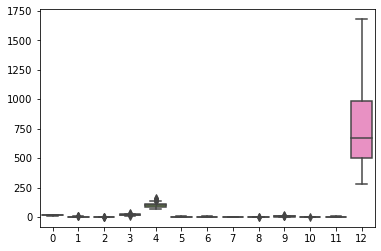

In [9]:
sns.boxplot(data=data.data)

In [11]:
x= StandardScaler().fit_transform(data.data)

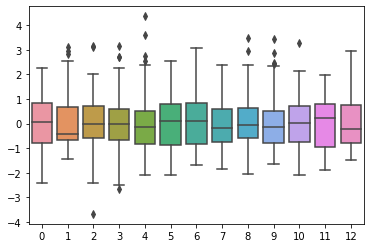

In [13]:
ax2=sns.boxplot(data=x)

55.4063383569353 %


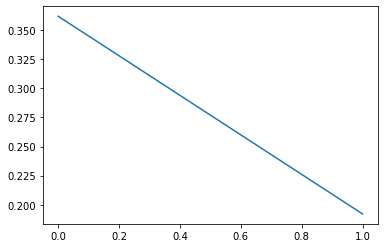

In [30]:
from sklearn.decomposition import PCA
pca2= PCA(n_components=2)
projwine2= pca2.fit_transform(x)
print(pca2.explained_variance_ratio_.sum()*100,"%")

plt.plot(pca2.explained_variance_ratio_)

Text(0.5, 1.0, 'PCA Plot')

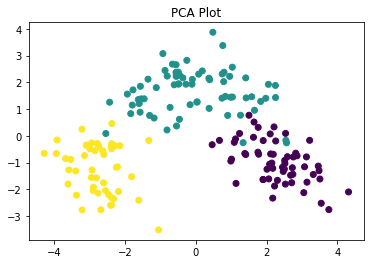

In [15]:
plt.scatter(projwine2[:,0], projwine2[:,1], c=data.target)
plt.title("PCA Plot")

Text(0, 0.5, 'Explained variance ration')

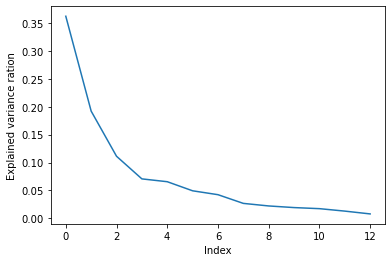

In [6]:
pca13= PCA()
projwine13=pca13.fit_transform(x)
plt.plot(pca13.explained_variance_ratio_)
plt.xlabel("Index")
plt.ylabel("Explained variance ration")

# task 2

In [44]:
from sklearn.datasets import load_boston
boston= load_boston()
inputs=boston.data
target= boston.target
print(inputs.shape)
print(target.shape)

(506, 13)
(506,)


In [50]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [34]:
from sklearn.model_selection import train_test_split
#80-20 split
train_x, train_y, test_x, test_y= train_test_split(inputs,  target, test_size=20,random_state=1, shuffle=True)
#the 80% in 60 -20 split
train_x60, train_y20, test_x60, test_y20= train_test_split(train_x,  test_x, test_size=0.25,random_state=1, shuffle=True)

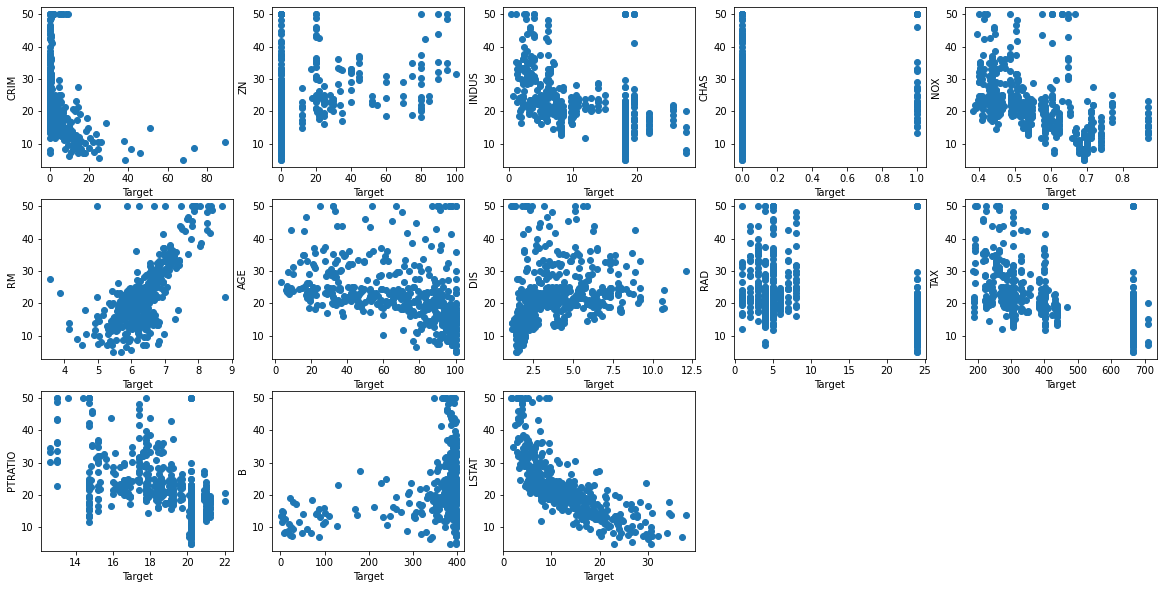

In [56]:
plt.figure(figsize=(20,10))
plt.tight_layout()
columns= boston.feature_names
for i in range(1,len(boston.feature_names)+1):
    plt.subplot(3,5,i)
    plt.scatter(train_x[:,i-1],test_x,)
    plt.ylabel(columns[i-1])
    plt.xlabel('Target')


In [63]:
scaler= StandardScaler().fit(train_x60)
strain_x= StandardScaler().fit_transform(train_x60)
strain_y= StandardScaler().fit_transform(train_y20)

## Linear Regression

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
lm1= LinearRegression()
lm1.fit(strain_x,test_x60)

LinearRegression()

In [70]:
print("intercept of line is : \n{}".format(lm1.intercept_))
print("Coefficients of line are : \n {}".format(lm1.coef_))

intercept of line is : 
22.85384615384617
Coefficients of line are : 
 [-0.69895664  1.44591202 -0.13329451  0.66036292 -2.31452144  2.43042038
  0.33049478 -3.44488571  2.88159845 -1.90900843 -2.18013598  0.8239976
 -4.08320442]


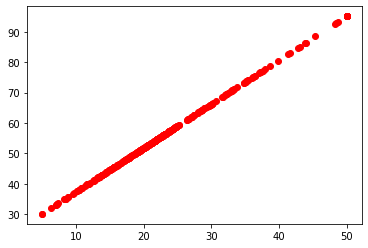

In [107]:
#plt.plot(test_x60)
plt.scatter(test_x60, (test_x60*1.445+22.853), c='r')

In [73]:
y_pred= lm1.predict(strain_y)
print("RMSE ",np.sqrt(metrics.mean_squared_error(test_y20, y_pred)))

RMSE  4.212927690533157


## SGD linear Regression

In [81]:
#instantiating SGDReggressor
from sklearn.linear_model import SGDRegressor
lm2= SGDRegressor( tol=1e-3, penalty=None, eta0=0.1)

In [83]:
%timeit lm2.fit(strain_x,test_x60)

528 µs ± 3.34 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [84]:
print(lm2.intercept_)
print(lm2.coef_)

[22.63297095]
[-0.89356164  1.04048698 -0.10111979  0.84467257 -2.37870307  2.39330449
  0.4431726  -3.68808512  2.91411854 -1.96051253 -1.98530414  0.84181727
 -4.14389192]


In [85]:
sgd_pred=lm2.predict(strain_y)
print("RMSE",np.sqrt(metrics.mean_squared_error(test_y20,sgd_pred)))

RMSE 4.160304329878971


In [89]:
from sklearn.preprocessing import PolynomialFeatures
scaler_poly= PolynomialFeatures(degree=2).fit(strain_x)
pftrain_x=scaler_poly.transform(strain_x)
pftrain_y= scaler_poly.transform(strain_y)

#scaler= StandardScaler().fit(train_x60)
#strain_x= StandardScaler().fit_transform(train_x60)
#strain_y= StandardScaler().fit_transform(train_y20)

In [96]:
lm1.fit(pftrain_x,test_x60)
y_predp= lm1.predict(pftrain_y)
print("RMSE ",np.sqrt(metrics.mean_squared_error(test_y20, y_predp)))
#print(y_predp)
print("intercept of line is : \n{}".format(lm1.intercept_))
print("Coefficients of line are : \n {}".format(lm1.coef_))

RMSE  3159900850566.9233
intercept of line is : 
-5676758151717.051
Coefficients of line are : 
 [-8.28094005e-13  2.73240673e+01  2.11593387e+01  7.22966711e+00
 -1.84486781e+13 -2.11891669e+00  3.47686364e+00 -2.05820820e+00
 -3.19005689e+00  5.71301270e+00 -1.07469482e+01  1.70959473e+00
  1.28515625e+00 -3.61938477e+00  1.10229492e-01  5.98073730e+01
  1.27558899e+01  8.94004822e+00 -1.32261658e+00  2.52920532e+00
 -1.97290039e+00 -6.06085205e+00  1.67783203e+01 -3.12728882e+01
  6.56753540e+00 -2.47070312e-01  2.05810547e+00 -7.83203125e-01
 -1.59765625e+00 -8.47534180e-01 -3.93945312e+00  1.17187500e-02
 -2.53906250e-01 -2.55859375e-01  3.66210938e-02  2.12426758e+00
 -7.24609375e-01  4.02099609e-01 -1.68066406e+00  2.68579102e+00
 -4.78683472e-01 -7.89245605e-01  1.29724121e+00  4.82666016e-01
  6.60156250e-01  5.44128418e-01  1.88146973e+00 -7.34130859e-01
 -8.51074219e-01 -1.05511475e+00  5.67675815e+12 -2.35107422e-01
 -1.14721680e+00  2.65014648e-01  1.58410645e+00 -4.957885

In [94]:
scaler_poly.get_feature_names()

['1',
 'x0',
 'x1',
 'x2',
 'x3',
 'x4',
 'x5',
 'x6',
 'x7',
 'x8',
 'x9',
 'x10',
 'x11',
 'x12',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x0 x3',
 'x0 x4',
 'x0 x5',
 'x0 x6',
 'x0 x7',
 'x0 x8',
 'x0 x9',
 'x0 x10',
 'x0 x11',
 'x0 x12',
 'x1^2',
 'x1 x2',
 'x1 x3',
 'x1 x4',
 'x1 x5',
 'x1 x6',
 'x1 x7',
 'x1 x8',
 'x1 x9',
 'x1 x10',
 'x1 x11',
 'x1 x12',
 'x2^2',
 'x2 x3',
 'x2 x4',
 'x2 x5',
 'x2 x6',
 'x2 x7',
 'x2 x8',
 'x2 x9',
 'x2 x10',
 'x2 x11',
 'x2 x12',
 'x3^2',
 'x3 x4',
 'x3 x5',
 'x3 x6',
 'x3 x7',
 'x3 x8',
 'x3 x9',
 'x3 x10',
 'x3 x11',
 'x3 x12',
 'x4^2',
 'x4 x5',
 'x4 x6',
 'x4 x7',
 'x4 x8',
 'x4 x9',
 'x4 x10',
 'x4 x11',
 'x4 x12',
 'x5^2',
 'x5 x6',
 'x5 x7',
 'x5 x8',
 'x5 x9',
 'x5 x10',
 'x5 x11',
 'x5 x12',
 'x6^2',
 'x6 x7',
 'x6 x8',
 'x6 x9',
 'x6 x10',
 'x6 x11',
 'x6 x12',
 'x7^2',
 'x7 x8',
 'x7 x9',
 'x7 x10',
 'x7 x11',
 'x7 x12',
 'x8^2',
 'x8 x9',
 'x8 x10',
 'x8 x11',
 'x8 x12',
 'x9^2',
 'x9 x10',
 'x9 x11',
 'x9 x12',
 'x10^2',
 'x10 x11',
 'x10 x1

In [17]:
#a=[[1.,2.],[3.,4.]]
#ainv= np.linalg.inv(a)
#print(ainv)
#mt=np.array([[2,4],[6,5],[1,0]])
#np.diag(mt)
#print(np.transpose(mt))

array([2, 5])